In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image, ImageOps
import numpy as np

In [2]:
# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 2. Flatten images (28x28 -> 784)
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

In [4]:
# 3. One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# 4. Build model 
model = Sequential([
    Dense(256, activation="relu", input_shape=(784,)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

C:\Users\Nandana\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 5. Compile
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
# 6. Train
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9120 - loss: 0.3020 - val_accuracy: 0.9600 - val_loss: 0.1360
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9671 - loss: 0.1071 - val_accuracy: 0.9743 - val_loss: 0.0842
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9788 - loss: 0.0700 - val_accuracy: 0.9773 - val_loss: 0.0760
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9845 - loss: 0.0495 - val_accuracy: 0.9787 - val_loss: 0.0735
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9880 - loss: 0.0380 - val_accuracy: 0.9782 - val_loss: 0.0763
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9905 - loss: 0.0286 - val_accuracy: 0.9758 - val_loss: 0.0878
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9915 - loss: 0.0271 - val_accuracy: 0.9808 - val_loss: 0.0712
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9932 - loss: 0.0205 - val_accuracy: 

In [8]:
# 7. Evaluate
loss, acc = model.evaluate(x_test, y_test)
print("Test accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9790 - loss: 0.0875
Test accuracy: 0.9789999723434448


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


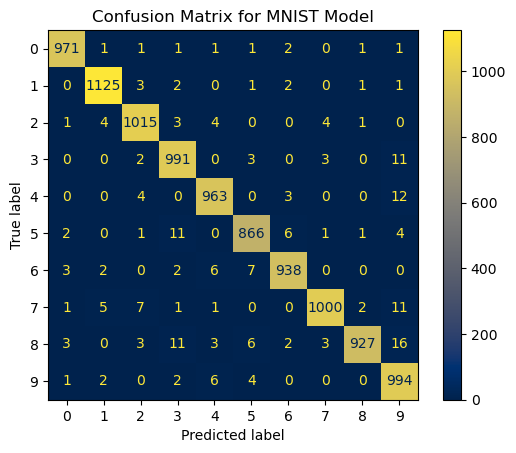

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap="cividis", values_format="d")
plt.title("Confusion Matrix for MNIST Model")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


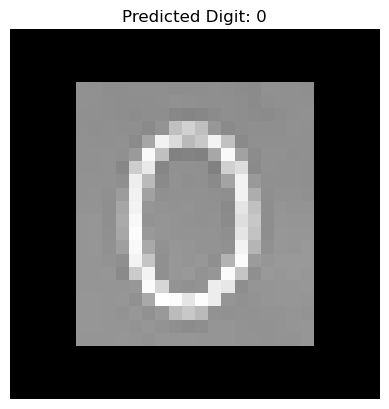

In [56]:
import matplotlib.pyplot as plt

def preprocess_digit_image_for_ann(path, invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img


# -------- Prediction + Visualization --------
image_path = "Zero.jpg"   # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


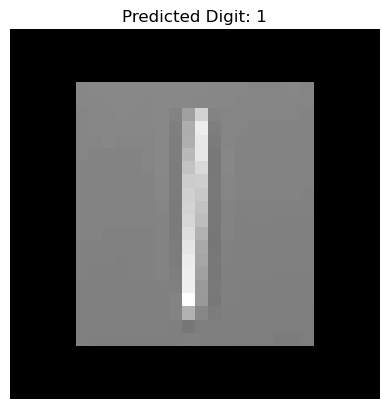

In [54]:
import matplotlib.pyplot as plt

def preprocess_digit_image_for_ann(path, invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img


# -------- Prediction + Visualization --------
image_path = "One.jpg"   # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


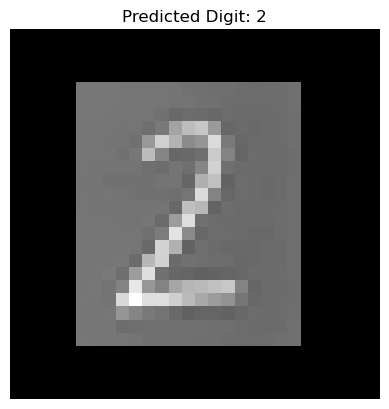

In [57]:
import matplotlib.pyplot as plt

def preprocess_digit_image_for_ann(path, invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img


# -------- Prediction + Visualization --------
image_path = "Two.jpg"   # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


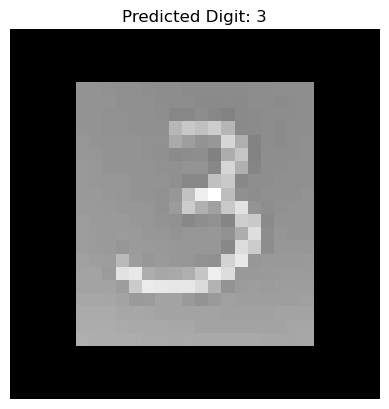

In [58]:
import matplotlib.pyplot as plt

def preprocess_digit_image_for_ann(path, invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img


# -------- Prediction + Visualization --------
image_path = "Three.jpg"   # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


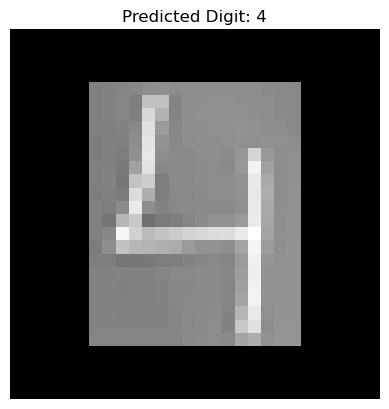

In [59]:
import matplotlib.pyplot as plt

def preprocess_digit_image_for_ann(path, invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img


# -------- Prediction + Visualization --------
image_path = "Four.jpg"   # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


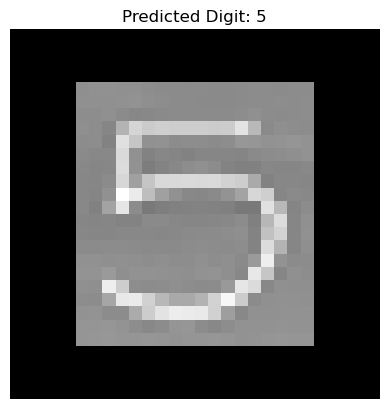

In [60]:
import matplotlib.pyplot as plt

def preprocess_digit_image_for_ann(path, invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img


# -------- Prediction + Visualization --------
image_path = "Five.jpg"   # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


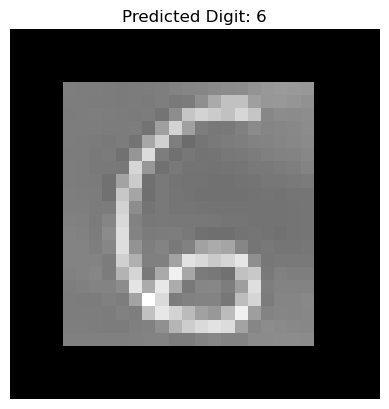

In [61]:
import matplotlib.pyplot as plt

def preprocess_digit_image_for_ann(path, invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img


# -------- Prediction + Visualization --------
image_path = "Six.jpg"   # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


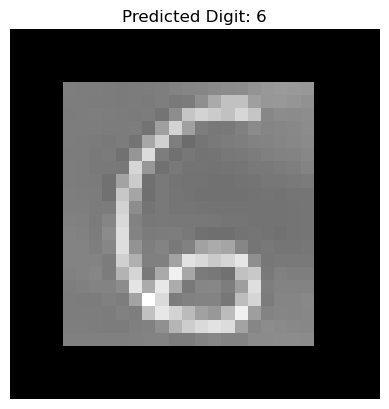

In [47]:
import matplotlib.pyplot as plt

def preprocess_digit_image_for_ann(path, invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img


# -------- Prediction + Visualization --------
image_path = "CNNSix.jpg"   # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


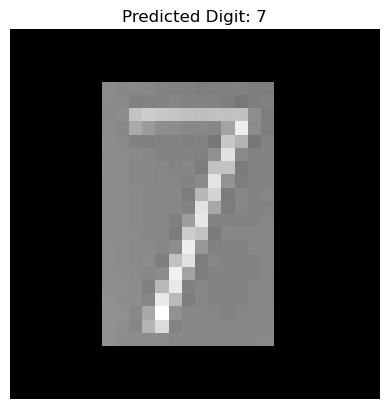

In [62]:
import matplotlib.pyplot as plt

def preprocess_digit_image_for_ann(path, invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img


# -------- Prediction + Visualization --------
image_path = "Seven.jpg"   # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


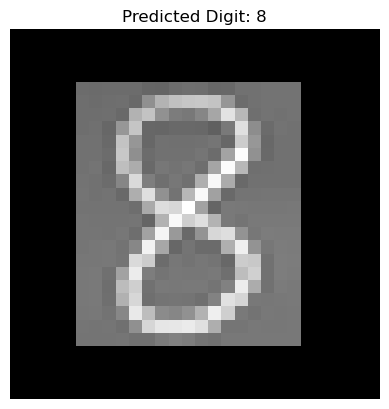

In [63]:
import matplotlib.pyplot as plt

def preprocess_digit_image_for_ann(path, invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img


# -------- Prediction + Visualization --------
image_path = "Eight.jpg"   # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


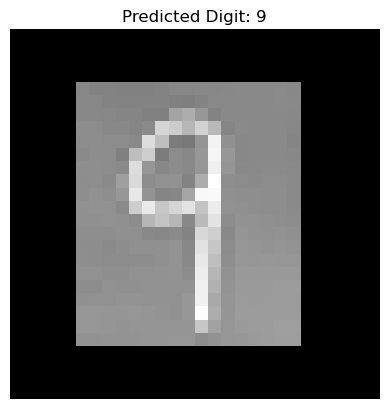

In [64]:
import matplotlib.pyplot as plt

def preprocess_digit_image_for_ann(path, invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img


# -------- Prediction + Visualization --------
image_path = "Nine.jpg"   # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()